# Preliminary results for pilot behavioral study

In [1]:
import os
os.chdir('/Users/wass/Documents/code/python')
import firstThird_game as ft
import statsmodels.api as sm
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ft.dir_setup('1st3rd_game/data_all')
dfs = ft.import_bulk_csv('*.csv')
# csv filenames were already cleaned

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import scipy.stats as stats
import pandas as pd

Each original subject dataset has the following structure:

In [3]:
dfs[0].head()

,harm,movieFile,color1,color3,color2,cardStim2,trialNo,cardStim1,scaleDescrip,trial_loop.thisRepN,...,postQ_start.keys,postQ_start.rt,postQ_resp.keys,postQ_resp.rt,date,frameRate,expName,session,participant,Unnamed: 32
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016_Dec_07_1206,60.104093,1st3rd_game_accOnly,1,10,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016_Dec_07_1206,60.104093,1st3rd_game_accOnly,1,10,NaN
2,0.0,julia_neutral_1.mov,-1.0,-1.0,1.0,card2.png,0.0,card1.png,NaN,0.0,...,NaN,NaN,NaN,NaN,2016_Dec_07_1206,60.104093,1st3rd_game_accOnly,1,10,NaN
3,1.0,julia_harm_1.mov,1.0,-1.0,-1.0,card1.png,1.0,card2.png,NaN,0.0,...,NaN,NaN,NaN,NaN,2016_Dec_07_1206,60.104093,1st3rd_game_accOnly,1,10,NaN
4,0.0,julia_neutral_2.mov,-1.0,-1.0,1.0,card3.png,2.0,card1.png,NaN,0.0,...,NaN,NaN,NaN,NaN,2016_Dec_07_1206,60.104093,1st3rd_game_accOnly,1,10,NaN


### Creating Group Column

In [4]:
group_assignments = list([1 for x in range(25)])
group_assignments_2 = list([3 for x in range(26,48)])
group_assignments = group_assignments + group_assignments_2
print('Initial N: ',len(group_assignments))

Initial N:  47


### Excluding participants

Participants who noticed the deception (N = 4) or who were accidentally shown the wrong game version due to experimenter error (N = 1) are excluded.

In [5]:
exclude_subs = [x-1 for x in [1,3,10,16,34]]
keep_subs = list([x for x in range(47) if x not in exclude_subs])
dfs = [dfs[x] for x in keep_subs]
group_assignments = [group_assignments[x] for x in keep_subs]
len(dfs)
print('N after exclusion: ',len(group_assignments))

N after exclusion:  42


## Manipulation checks: randomness/control/deception

Manipulation-check questions include:
* How much control did you feel you/the active player had over the outcome of the game?
* Did you believe that the outcomes of the cards were random?
* Did you believe that you were playing with a real person/that you were viewing a game played between two real participants?

In [6]:
has_cols = [x for x in dfs if 'scaleDescrip' in list(x)]
groups_sm = [y for (x,y) in zip(dfs,group_assignments) if 'scaleDescrip' in list(x)]
for x in range(len(has_cols)):
    has_cols[x]['group'] = groups_sm[x]

In [7]:
# print(len(has_cols))
# print(len(groups_sm))

In [8]:
# has_cols[0].head()

In [9]:
dfs_post = ft.combine_dfs(has_cols,['participant','scaleDescrip','postQ_resp.keys','group'])

All subject-specific datasets combined into a single dataset with the following structure:

In [10]:
dfs_post = dfs_post.rename(columns={'postQ_resp.keys':'response'})
dfs_post.head()

,participant,scaleDescrip,response,group
0,1,How much control did you feel you had over the...,3.0,1
1,1,Did you believe that the outcomes of the cards...,3.0,1
2,1,Did you believe that you were playing with a r...,1.0,1
3,2,How much control did you feel you had over the...,1.0,1
4,2,Did you believe that you were playing with a r...,2.0,1


In [11]:
dfs_piv=dfs_post.pivot_table(index=['participant','group'],columns='scaleDescrip',values='response')
dfs_piv.head()
dfs_piv.columns = ['randomness','real_person_1p','real_person_3p','control_1p','control_3p']

In [12]:
# dfs_piv.head()

In [13]:
dfs_piv['real_person']=dfs_piv[['real_person_1p','real_person_3p']].sum(axis=1)

In [14]:
dfs_piv['control']=dfs_piv[['control_1p','control_3p']].sum(axis=1)

In [15]:
# dfs_piv.head()
dfs_piv.to_csv('../data_manipulation_vars.csv')

### Plotting perceived randomness/control/deception 

Combined dataset, all subjects:

{'boxes': [<matplotlib.lines.Line2D at 0x1172a8940>],
 'caps': [<matplotlib.lines.Line2D at 0x1172aec18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1172b8b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1172b4c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1172a8be0>,
  <matplotlib.lines.Line2D at 0x1171fc0f0>]}

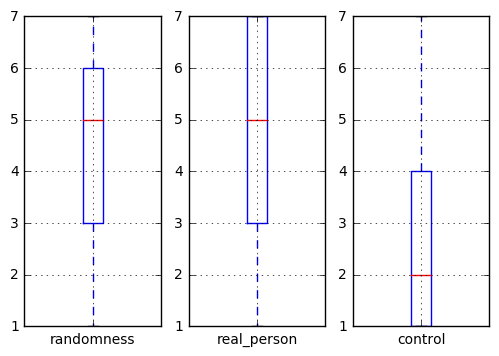

In [16]:
fig, axs = plt.subplots(1,3)
dfs_piv.boxplot(column='randomness',ax=axs[0],return_type='dict')
dfs_piv.boxplot(column='real_person',ax=axs[1],return_type='dict')
dfs_piv.boxplot(column='control',ax=axs[2],return_type='dict')

In [17]:
dfs_piv=dfs_piv.reset_index(level=['group'])

Subjects in 1st-person condition only:

{'boxes': [<matplotlib.lines.Line2D at 0x1175df550>],
 'caps': [<matplotlib.lines.Line2D at 0x11770e940>,
 'fliers': [<matplotlib.lines.Line2D at 0x117715b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117715320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1177099b0>,
  <matplotlib.lines.Line2D at 0x117709b38>]}

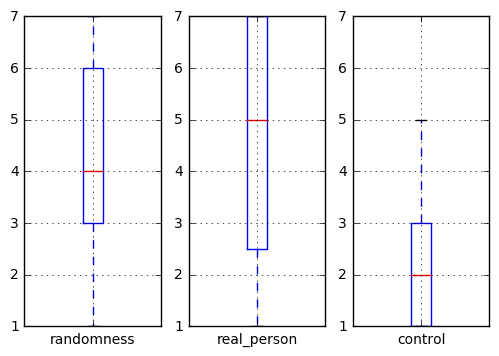

In [18]:
dfs_piv_1 = dfs_piv[dfs_piv['group']==1]
fig, axs = plt.subplots(1,3)
dfs_piv_1.boxplot(column='randomness',ax=axs[0],return_type='dict')
dfs_piv_1.boxplot(column='real_person',ax=axs[1],return_type='dict')
dfs_piv_1.boxplot(column='control',ax=axs[2],return_type='dict')

Subjects in 3rd-person condition only:

{'boxes': [<matplotlib.lines.Line2D at 0x117a08e10>],
 'caps': [<matplotlib.lines.Line2D at 0x117a146d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x117a19f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117a190b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117a08f98>,
  <matplotlib.lines.Line2D at 0x117a0ff60>]}

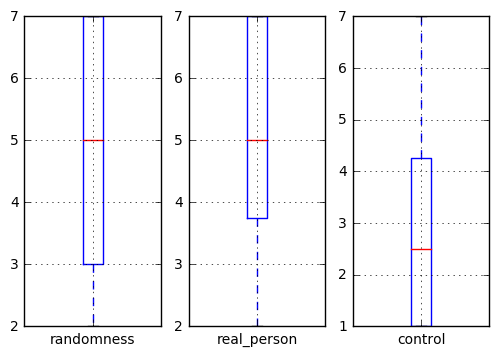

In [19]:
dfs_piv_3 = dfs_piv[dfs_piv['group']==3]
fig, axs = plt.subplots(1,3)
dfs_piv_3.boxplot(column='randomness',ax=axs[0],return_type='dict')
dfs_piv_3.boxplot(column='real_person',ax=axs[1],return_type='dict')
dfs_piv_3.boxplot(column='control',ax=axs[2],return_type='dict')

### Do the manipulation-check variables differ by perspective?

#### Differences in perceived randomness

In [20]:
stats.ttest_ind(dfs_piv_1['randomness'],dfs_piv_3['randomness'])

Ttest_indResult(statistic=-1.1996280421032575, pvalue=0.23882621893366332)

#### Differences in perceived control

In [21]:
stats.ttest_ind(dfs_piv_1['control'],dfs_piv_3['control'])

Ttest_indResult(statistic=-0.60236900073363175, pvalue=0.55104556803497118)

#### Differences in sense that partner/other player is real

In [22]:
stats.ttest_ind(dfs_piv_1['real_person'],dfs_piv_3['real_person'])

Ttest_indResult(statistic=-0.49852363531324395, pvalue=0.62142171330663731)

Overall, there were no significant cross-group differences in ratings for the three control variables.


Note that due to technical error, not all participants in the 3rd-person condition saw the manipulation-check questions.

## Modeling wrongness judgments

## model: effect of harm versus no harm on wrongness judgments

"Harm" trials were those in which a video of the passive player experiencing a noise blast was shown. "No harm" trials featured a video of a neutral response.

In [23]:
for x in range(len(dfs)):
    dfs[x]['group']=group_assignments[x]

In [24]:
dfs_wrong = ft.combine_dfs(dfs,['participant','group','harm','wrongness.response'])
dfs_wrong = dfs_wrong.rename(columns={'wrongness.response':'wrongness'})
dfs_wrong.harm = dfs_wrong.harm.astype(int)
dfs_wrong.head()

,participant,group,harm,wrongness
0,1,1,0,2.0
1,1,1,1,4.0
2,1,1,0,1.0
3,1,1,1,5.0
4,1,1,0,1.0


Modeling the effect of harm (no harm versus harm) on wrongness

In [25]:
dfs_wrong.to_csv('../data_wrongness.csv')

In [25]:
wrongness_model = sm.MixedLM.from_formula("wrongness ~ harm",dfs_wrong,groups=dfs_wrong['participant'])
wrongness_result = wrongness_model.fit()
print(wrongness_result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: wrongness 
No. Observations: 1008    Method:             REML      
No. Groups:       42      Scale:              1.9689    
Min. group size:  24      Likelihood:         -1814.8787
Max. group size:  24      Converged:          Yes       
Mean group size:  24.0                                  
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  1.421     0.126  11.233  0.000   1.173   1.669
harm       3.508     0.088  39.686  0.000   3.335   3.681
groups RE  0.508     0.095                               



Modeling the interaction effect of harm x group (1st- versus 3rd-person perspective) on wrongness

In [26]:
wrongness_model = sm.MixedLM.from_formula("wrongness ~ harm*group",dfs_wrong,groups=dfs_wrong['participant'])
wrongness_result = wrongness_model.fit()
print(wrongness_result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: wrongness 
No. Observations: 1008    Method:             REML      
No. Groups:       42      Scale:              1.9419    
Min. group size:  24      Likelihood:         -1808.3638
Max. group size:  24      Converged:          Yes       
Mean group size:  24.0                                  
--------------------------------------------------------
               Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.278    0.273  4.681 0.000  0.743  1.813
harm           2.841    0.196 14.475 0.000  2.457  3.226
group          0.071    0.122  0.585 0.558 -0.168  0.311
harm:group     0.333    0.088  3.797 0.000  0.161  0.505
groups RE      0.464    0.089                           



In [27]:
interaction_gp = dfs_wrong.groupby(by=['group','harm'])

In [29]:
int_unstack = interaction_gp['wrongness'].aggregate(np.mean).unstack()
print('Mean wrongness ratings by harm/group\n',int_unstack)

Mean wrongness ratings by harm/group
 harm          0         1
group                    
1      1.349206  4.523810
3      1.492063  5.333333


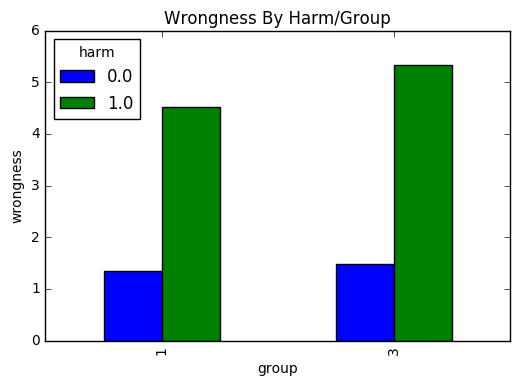

In [120]:
int_unstack.plot(kind='bar',title='Wrongness By Harm/Group')
plt.ylabel('wrongness')
plt.show()